#**PRUEBA UNITARIA MODELO: Árboles de decisión**

In [ ]:
# Importar las librerias
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar el archivo csv desde drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Clima_sin_Presion.csv"
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# Codificar columnas categoricas
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Definir atributos y clase
X = df.drop("Condition", axis=1)
y = df["Condition"]
print(label_encoders["Condition"].classes_)

['Cloudy' 'Considerably Cloudy' 'Fair' 'Fog' 'Haze' 'Heavy Rain'
 'Heavy T-Storm' 'Mist' 'Rain' 'Thunder']


In [ ]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Crear y entrenar el modelo
Modelo_Arbol = DecisionTreeClassifier(max_depth=30, random_state=42)
Modelo_Arbol.fit(X_train, y_train)

y_pred = Modelo_Arbol.predict(X_test)

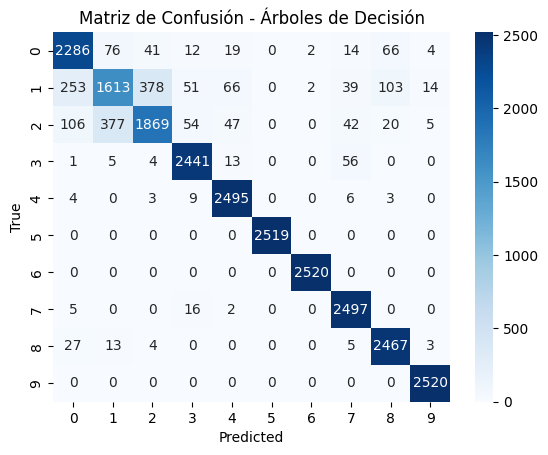

Accuracy: 0.9218160892169702

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      2520
           1       0.77      0.64      0.70      2519
           2       0.81      0.74      0.78      2520
           3       0.95      0.97      0.96      2520
           4       0.94      0.99      0.97      2520
           5       1.00      1.00      1.00      2519
           6       1.00      1.00      1.00      2520
           7       0.94      0.99      0.96      2520
           8       0.93      0.98      0.95      2519
           9       0.99      1.00      0.99      2520

    accuracy                           0.92     25197
   macro avg       0.92      0.92      0.92     25197
weighted avg       0.92      0.92      0.92     25197



In [ ]:
# Mostrar resultados
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión - Árboles de Decisión")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
print(label_encoders["Condition"].classes_)

['Cloudy' 'Considerably Cloudy' 'Fair' 'Fog' 'Haze' 'Heavy Rain'
 'Heavy T-Storm' 'Mist' 'Rain' 'Thunder']
